In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#dropping some columns and then cleaning the data


In [5]:
columns_to_drop=["PassengerId","Cabin","Embarked","Name","Ticket"]
data_clean=data.drop(columns_to_drop,axis=1)
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()
data_clean["Sex"]=le.fit_transform(data_clean["Sex"])

In [8]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [9]:
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [10]:
data_clean=data_clean.fillna(data_clean["Age"].mean())

In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [12]:
from sklearn.impute import SimpleImputer

In [13]:
input_col=["Age","Pclass","Sex","SibSp","Parch","Fare"]
output_col=["Survived"]

In [14]:
X=data_clean[input_col]
Y=data_clean[output_col]

In [42]:
X.head()
X.shape


(891, 6)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
sk=DecisionTreeClassifier(criterion='entropy',max_depth=5)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
sk.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [21]:
sk.score(X_test,y_test)

0.770949720670391

In [22]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\apurbo\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


random forest

In [23]:
import pydotplus

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=6)

In [44]:
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=10)

In [45]:
rf.score(X_train,y_train)

0.8595505617977528

In [46]:
rf.score(X_test,y_test)

0.7877094972067039

In [47]:
from sklearn.model_selection import cross_val_score

In [49]:
acc=cross_val_score(RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=6),X_train,y_train.values.ravel(),cv=5).mean()

In [36]:
print(acc)

0.8032896680784004


In [50]:
acc_list=[]
for i in range(1,51):
    acc=cross_val_score(RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=6),X_train,y_train.values.ravel(),cv=5).mean()
    acc_list.append(acc)

In [51]:
print(acc_list)

[0.7766669949768541, 0.7865163006008076, 0.8061656653205949, 0.8019107652910471, 0.806136117403723, 0.8174135723431497, 0.8103319215995273, 0.8229784300206836, 0.821609376538954, 0.8201418300009848, 0.8131586723136021, 0.813158672313602, 0.8074854722742046, 0.8131685216192259, 0.8342263370432385, 0.8074854722742048, 0.828592534226337, 0.8173840244262779, 0.8286319314488327, 0.8229981286319313, 0.8187629272136314, 0.8159263271939328, 0.8243967300305328, 0.8187432286023835, 0.8271939328277357, 0.8314192849404117, 0.8314192849404117, 0.8103319215995273, 0.8271742342164877, 0.81312912439673, 0.8286220821432091, 0.8243770314192849, 0.8300206835418104, 0.8159263271939328, 0.832798187727765, 0.8272037821333595, 0.8201418300009848, 0.8187924751305033, 0.8257854821235103, 0.8187727765192554, 0.8187432286023835, 0.8229784300206836, 0.8229685807150595, 0.8300305328474344, 0.8229882793263077, 0.8271939328277356, 0.828592534226337, 0.8173446272037822, 0.828592534226337, 0.8271840835221116]


In [53]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

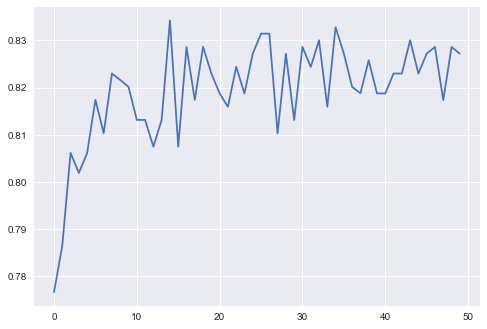

In [55]:
plt.plot(acc_list)
plt.show()

In [56]:
print(np.argmax(acc_list))

14
